In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weights = np.load(r"E:\graphsum\data\attention_weights\pretrained_attention_weights.npy")
parent_idx = np.load(r"E:\graphsum\data\attention_weights\parent_idx.npy")
scores = np.load(r"E:\graphsum\data\attention_weights\scores.npy")

In [3]:
parent_idx.shape

(10, 5, 300)

In [4]:
parent_idx[[0,1,2,3,4,5],:,287]

array([[ 0,  0,  1,  2,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [26, 26, 27, 28, 29]])

In [5]:
scores.shape

(10, 5, 300)

In [6]:
scores[2,0,1]

-0.870679

In [7]:
scores[[1,1,2,2],[0,1,0,0],1]

array([-1.706736 , -1.8712008, -0.870679 , -0.870679 ], dtype=float32)

In [8]:
"""end_dict = {
    0:228,
    1:300,
    2:272,
    3:288,
    4:273,
    5:300,
    6:300,
    7:300,
    8:256,
    9:300
}"""

'end_dict = {\n    0:228,\n    1:300,\n    2:272,\n    3:288,\n    4:273,\n    5:300,\n    6:300,\n    7:300,\n    8:256,\n    9:300\n}'

In [9]:
end_dict = {
    0:227,
    1:299,
    2:271,
    3:287,
    4:272,
    5:299,
    6:299,
    7:299,
    8:255,
    9:299
}

In [10]:
attention_weights_matrix = np.zeros(shape=weights.shape)
parent_idx_matrix = -np.ones(shape=parent_idx.shape)
scores_matrix = -np.ones(shape=scores.shape)

In [11]:
first_finished = np.min(list(end_dict.values()))

In [12]:
attention_weights_matrix[:,:,:first_finished,:,:] = weights[:,:,:first_finished,:,:]
parent_idx_matrix[:,:,:first_finished] = parent_idx[:,:,:first_finished]
scores_matrix[:,:,:first_finished] = scores[:,:,:first_finished]

In [13]:
for i in range(first_finished,300):
    liste = np.array(list(end_dict.values()))
    
    remaining_examples = np.delete(np.arange(0,10,1),np.where((liste<i)))
    tmp_cumsum = np.delete(np.cumsum(1*(liste<i)), np.where(liste<i))

    scores_matrix[remaining_examples,:,i] = scores[remaining_examples-tmp_cumsum,:,i]
    parent_idx_matrix[remaining_examples,:,i] = parent_idx[remaining_examples-tmp_cumsum,:,i]
    attention_weights_matrix[remaining_examples,:,i,:,:] = weights[remaining_examples-tmp_cumsum,:,i,:,:]
    """
    for j in remaining_examples:
        current_sum = tmp_cumsum[j]
        tmp[j,:,i,:,:] = weights[j-current_sum,:,i,:,:]
    """
        

In [14]:
attention_weights_matrix[0,0,225:230,0,0,:]

array([[1.23438232e-01, 1.43527851e-01, 1.55710518e-01, 1.12336189e-01,
        2.07548350e-01, 1.34190410e-01, 1.23248495e-01, 3.32868282e-29,
        3.32868282e-29, 3.32868282e-29, 3.32868282e-29, 3.32868282e-29,
        3.32868282e-29, 3.32868282e-29, 3.32868282e-29, 3.32868282e-29,
        3.32868282e-29, 3.32868282e-29, 3.32868282e-29, 3.32868282e-29,
        3.32868282e-29, 3.32868282e-29, 3.32868282e-29, 3.32868282e-29,
        3.32868282e-29, 3.32868282e-29, 3.32868282e-29, 3.32868282e-29,
        3.32868282e-29, 3.32868282e-29],
       [1.20142266e-01, 1.51126146e-01, 1.53657332e-01, 1.13200314e-01,
        2.00679019e-01, 1.35847911e-01, 1.25346988e-01, 3.21851181e-29,
        3.21851181e-29, 3.21851181e-29, 3.21851181e-29, 3.21851181e-29,
        3.21851181e-29, 3.21851181e-29, 3.21851181e-29, 3.21851181e-29,
        3.21851181e-29, 3.21851181e-29, 3.21851181e-29, 3.21851181e-29,
        3.21851181e-29, 3.21851181e-29, 3.21851181e-29, 3.21851181e-29,
        3.21851181e-29,

In [15]:
tmp = np.argmax(scores_matrix, axis=1)

In [16]:
tmp[[np.arange(0,10,1)],np.array(list(end_dict.values()))-1]

array([[4, 4, 0, 0, 4, 4, 4, 0, 4, 4]], dtype=int64)

In [17]:
def transform_parent_idx(parent_idx_vector):
    return parent_idx_vector - (int(parent_idx_vector[0] / len(parent_idx_vector)) * len(parent_idx_vector))


def transform_attention_weights_decoder(attention_weights, parent_idx, end_array):
    examples,beam_size,number_steps,_,_,_ = attention_weights.shape
        
    decoded_weight_matrix = np.zeros(shape=attention_weights.shape)
    
    remaining_examples = np.delete(np.arange(0,examples,1),np.where((end_array<number_steps)))
    
    current_transformed_parent_idx_matrix = np.tile(np.arange(0,5),10).reshape(-1,5)
    
    
    
    
    
    for i in range(number_steps):
        current_step = number_steps - i - 1        
        
        remaining_examples = np.delete(np.arange(0,examples,1),np.where((end_array<current_step)))
        
        current_transformed_parent_idx = current_transformed_parent_idx_matrix[remaining_examples,:]
        
        current_parent_idx = parent_idx_matrix[np.repeat(remaining_examples,beam_size), current_transformed_parent_idx.reshape(-1,).astype("int"), current_step]
        
        current_transformed_parent_idx = np.apply_along_axis(transform_parent_idx,1,current_parent_idx.reshape(-1,beam_size)).astype("int")
                
        tmp = attention_weights[np.repeat(remaining_examples,beam_size),current_transformed_parent_idx.reshape(-1,), current_step]
        
        decoded_weight_matrix[np.repeat(remaining_examples,beam_size),np.tile(np.arange(0,beam_size),len(remaining_examples)), current_step] = tmp
        
        current_transformed_parent_idx_matrix[remaining_examples,:] = current_transformed_parent_idx
    
    return decoded_weight_matrix
    

In [18]:
decoded_weight_matrix = transform_attention_weights_decoder(attention_weights_matrix, parent_idx_matrix, np.array(list(end_dict.values())))

In [19]:
end_dict

{0: 227,
 1: 299,
 2: 271,
 3: 287,
 4: 272,
 5: 299,
 6: 299,
 7: 299,
 8: 255,
 9: 299}

In [20]:
parent_idx_matrix[5,:,-11:]

array([[5., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6., 5., 5., 5., 5., 6.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [21]:
attention_weights_matrix[5,:,-11:,0,0,10]

array([[0.02811787, 0.04044538, 0.04761216, 0.02529722, 0.03795138,
        0.02550224, 0.04389553, 0.06127176, 0.05143498, 0.03740573,
        0.03051942],
       [0.02874371, 0.02699894, 0.04607017, 0.04650614, 0.03429821,
        0.02490742, 0.0296607 , 0.0305501 , 0.03632441, 0.03771804,
        0.02953792],
       [0.03022351, 0.02999103, 0.02858915, 0.02762834, 0.02541928,
        0.02614585, 0.02624298, 0.02674947, 0.02748484, 0.02591635,
        0.02478315],
       [0.02945891, 0.02888205, 0.02863434, 0.02764697, 0.02542756,
        0.0261869 , 0.02630191, 0.02672738, 0.02661075, 0.02502257,
        0.02480594],
       [0.03954127, 0.03833859, 0.03531868, 0.03337749, 0.02867799,
        0.02585902, 0.02613449, 0.02649349, 0.0258611 , 0.02535532,
        0.02577459]])

In [22]:
decoded_weight_matrix[5,1,-11:,0,0,10]

array([0.02874371, 0.02699894, 0.04761216, 0.02529722, 0.03795138,
       0.02550224, 0.04389553, 0.06127176, 0.05143498, 0.03740573,
       0.02953792])

In [23]:
np.exp(scores_matrix[9,:,299]) / np.sum(np.exp(scores_matrix[9,:,299]))

array([0.00834123, 0.02880712, 0.23204914, 0.24618532, 0.4846172 ])

In [24]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [25]:
def slider_function(step_idx=0, decoding_layer=0):
    fig,axs = plt.subplots(2,5, figsize=(15,10))
    print(step_idx)
    for i in range(10):
        row = int(i/5)
        col = i%5
        axs[row,col].plot(decoded_weight_matrix[i,np.argmax(scores_matrix[i,:,end_dict[i]]),step_idx,decoding_layer,0,:])
        axs[row,col].set_title(r"Example: $%d$" % (i))
    plt.tight_layout()
    display()

0


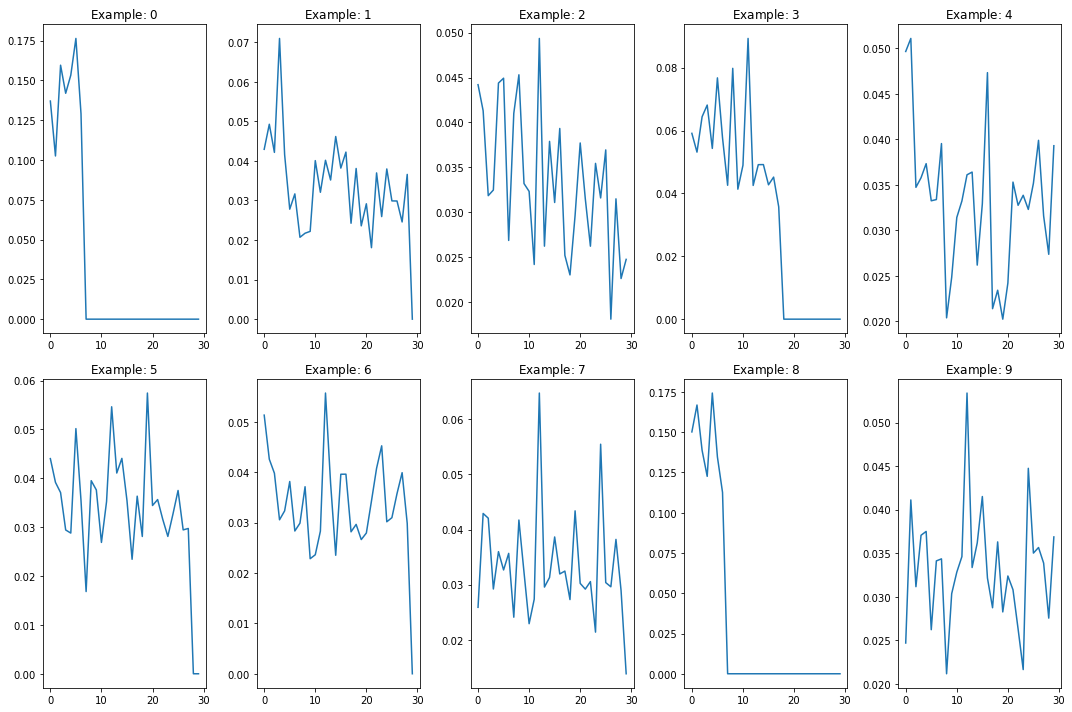

In [26]:
slider_function(0)

In [27]:
for j in range(10):
    print(j)
    for i in range(8):
        print(np.max(decoded_weight_matrix[j,:,0,i,0,:] - decoded_weight_matrix[j,:,299,i,0,:] ))
    

0
0.17641079425811768
0.19403758645057678
0.1758246272802353
0.311467707157135
0.20738346874713898
0.24743621051311493
0.18980349600315094
0.27104875445365906
1
0.04054585471749306
0.03176311403512955
0.02272311318665743
0.06956093199551105
0.06957006640732288
0.0542537197470665
0.030996188521385193
0.28608531691133976
2
0.04935753718018532
0.06119224429130554
0.060532860457897186
0.07210462540388107
0.07298903912305832
0.09094736725091934
0.10178624838590622
0.2838044762611389
3
0.08929994702339172
0.08966357260942459
0.10340406000614166
0.15311726927757263
0.096824049949646
0.18385609984397888
0.10549179464578629
0.29452186822891235
4
0.051078855991363525
0.055580031126737595
0.0438113808631897
0.08984679728746414
0.0626588985323906
0.08375454694032669
0.10006462782621384
0.2503744661808014
5
0.022985924035310745
0.018375709652900696
0.04275372438132763
0.11044367216527462
0.06220828741788864
0.04245653748512268
0.04675251431763172
0.15097825974225998
6
0.027557888999581337
0.0316335

0


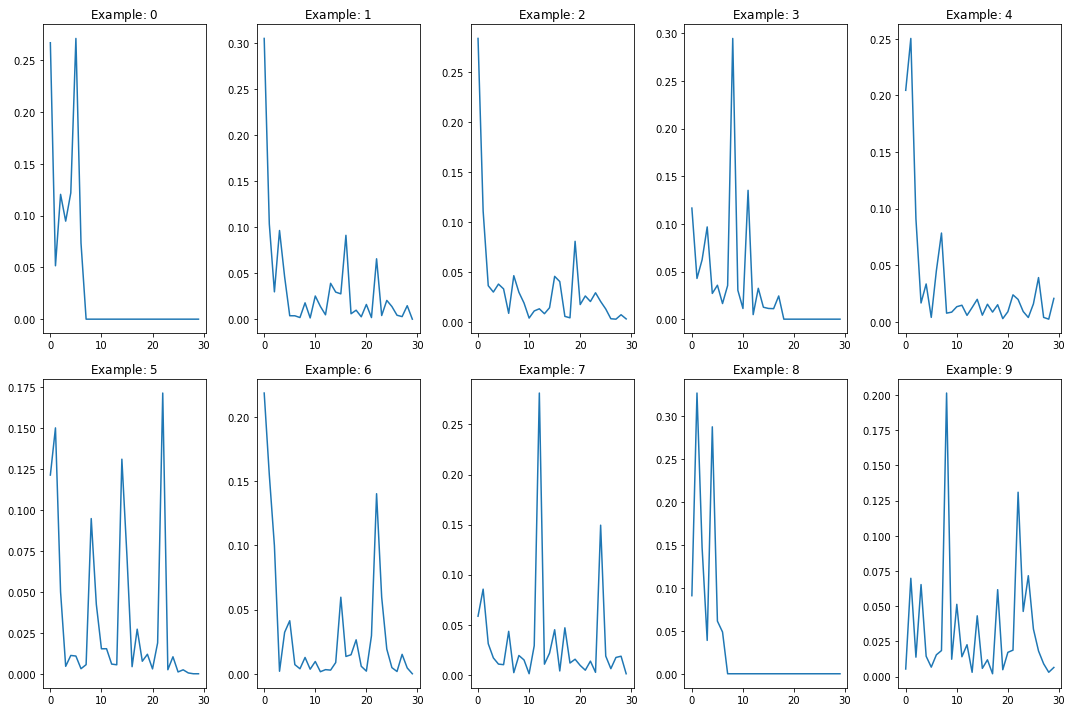

In [28]:
slider_function(0,7)

227


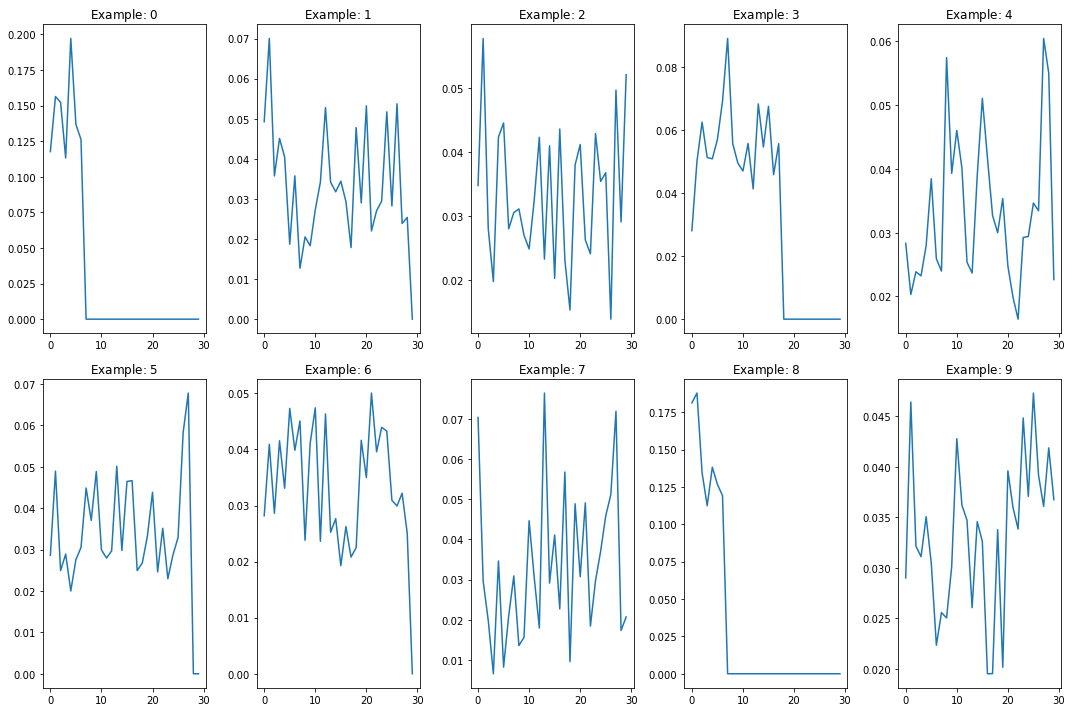

In [29]:
slider_function(227)